In [1]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st


pio.renderers.default = "png"

In [2]:
from utils import compute_optimal_value_and_policy, simulate

In [3]:
T = 150
X = 10

value, policy = compute_optimal_value_and_policy(T, X)

In [4]:
# MAX EXPECTED REWARD FOR STARTING X = 5
print("Max expected reward of starting X = 5:", value[5][0])

Max expected reward of starting X = 5: 32.608869394070496


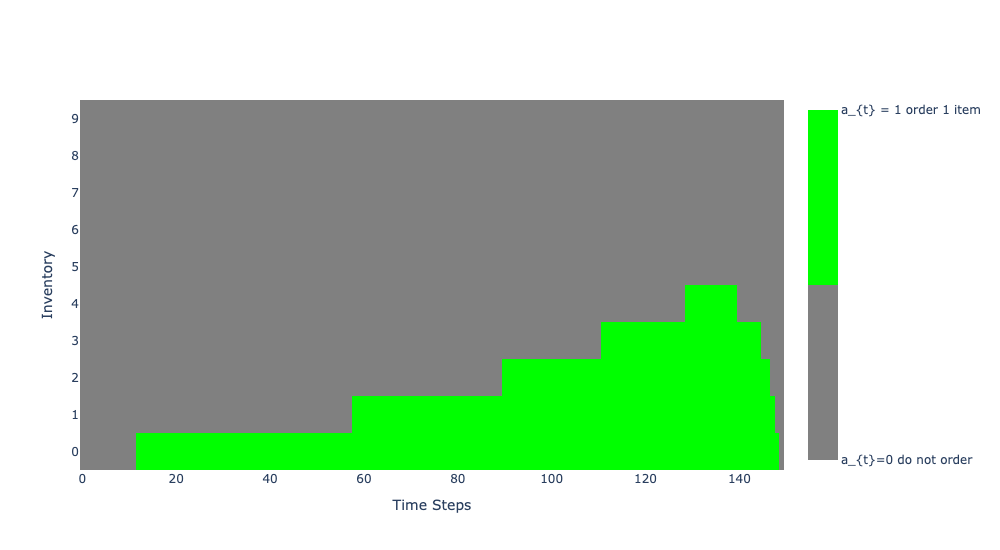

In [5]:
# PLOTTING THE OPTIMAL POLICY

fig = go.Figure()

colorscale = [[0, "grey"], [0.5, "grey"], [0.5, "lime"], [1, "lime"]]
fig.add_trace(
    go.Heatmap(
        z=policy,
        colorscale=colorscale,
        colorbar=dict(tickvals=[0, 1], ticktext=["a_{t}=0 do not order", "a_{t} = 1 order 1 item"]),
    )
)

fig.update_xaxes(title="Time Steps")
fig.update_yaxes(title="Inventory", tickvals=np.arange(X))

fig.update_layout(width=1000, height=550)

fig.show()

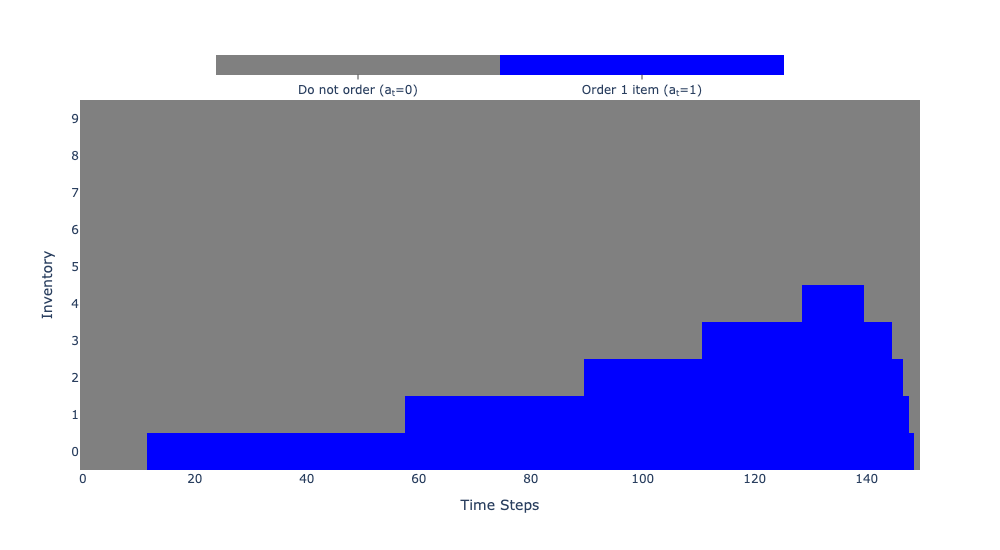

In [ ]:
# PLOTTING THE OPTIMAL POLICY
fig = go.Figure()

colorscale = [[0, "grey"], [0.5, "grey"], [0.5, "blue"], [1, "blue"]]

fig.add_trace(
    go.Heatmap(
        z=policy,
        colorscale=colorscale,
        showscale=True,
        colorbar=dict(orientation='h', y=1.15, x=0.5, yanchor='top', tickmode='array', tickvals=[0.25, 0.75], ticktext=["Do not order (a<sub>t</sub>=0)", "Order 1 item (a<sub>t</sub>=1)"], ticks="outside", thickness=20, len=0.7)
    )
)

fig.update_xaxes(title="Time Steps")
fig.update_yaxes(title="Inventory", tickvals=np.arange(X))
fig.update_layout(width=1000, height=550)

fig.show()

In [7]:
# SIMULATING
rewards = simulate(policy, starting_state=5, iter=1000)

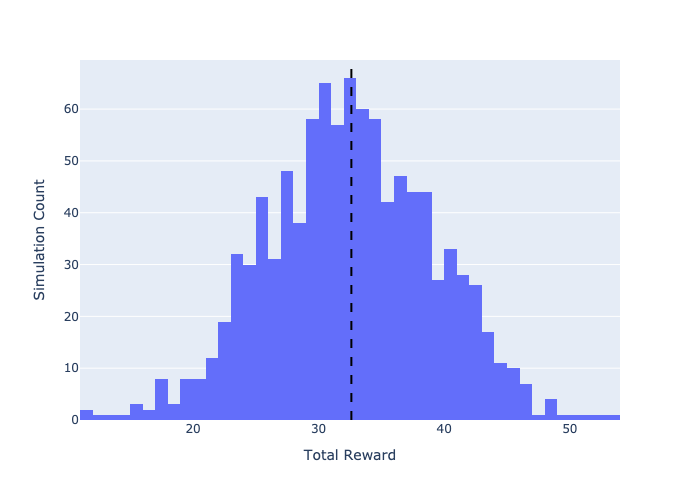

In [8]:
fig = px.histogram(rewards)

fig.add_vline(value[5][0], line_dash="dash", line_color="black")

fig.update_layout(showlegend=False)
fig.update_xaxes(title="Total Reward")
fig.update_yaxes(title="Simulation Count")

fig.show()

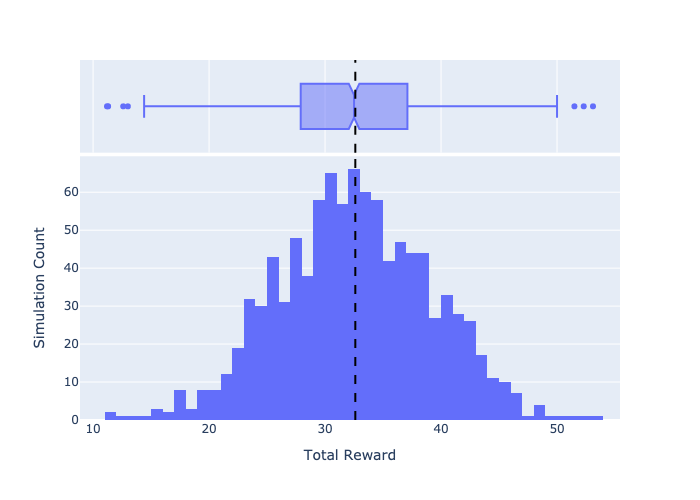

In [9]:
fig = px.histogram(
    rewards,
    marginal="box",  # boxplot
)
fig.add_vline(x=value[5][0], line_dash="dash", line_color="black")
fig.update_layout(showlegend=False, xaxis_title="Total Reward")
fig.update_yaxes(title="Simulation Count", row=1, col=1)

fig.show()

Mean Reward: 32.47
95% Confidence Interval: [32.06, 32.88]


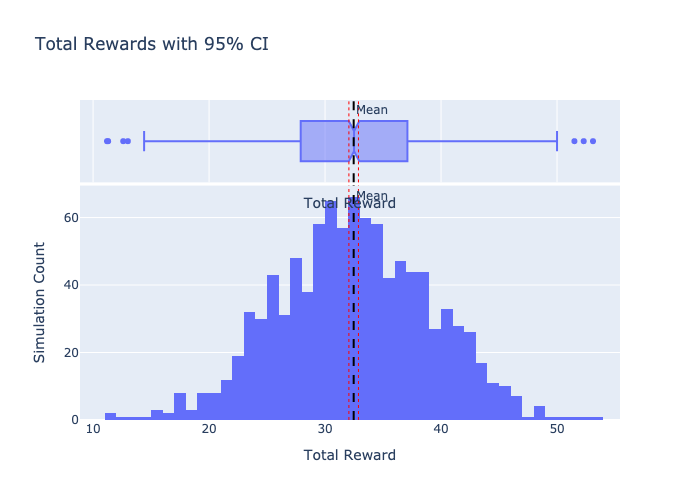

In [10]:
# 95% CI for the mean
confidence = 0.95
mean_reward = np.mean(rewards)
sem = st.sem(rewards)  # Standard Error of the Mean

# Use t-distribution for generic CI calculation
ci_lower, ci_upper = st.t.interval(confidence, df=len(rewards)-1, loc=mean_reward, scale=sem)

print(f"Mean Reward: {mean_reward:.2f}")
print(f"{int(confidence*100)}% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

# 2. Plot with CI lines
fig = px.histogram(rewards, marginal="box", title="Total Rewards with 95% CI")

# Mean line
fig.add_vline(x=mean_reward, line_width=2, line_dash="dash", line_color="black", annotation_text="Mean")

# CI lines (often red or lighter to distinguish from the main mean line)
fig.add_vline(x=ci_lower, line_width=1, line_dash="dot", line_color="red")
fig.add_vline(x=ci_upper, line_width=1, line_dash="dot", line_color="red")

fig.update_layout(showlegend=False)
fig.update_xaxes(title="Total Reward")
fig.update_yaxes(title="Simulation Count", row=1, col=1)

fig.show()

In [11]:
# Perform Shapiro-Wilk test
shapiro_stat, shapiro_p = st.shapiro(rewards)

print(f"Shapiro-Wilk Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4e}")

alpha = 0.05
if shapiro_p > alpha:
    print("Result: Fail to reject H0. The data looks normally distributed.")
else:
    print("Result: Reject H0. The data does NOT look normally distributed.")

Shapiro-Wilk Statistic: 0.9989
P-value: 7.9286e-01
Result: Fail to reject H0. The data looks normally distributed.
